<a href="https://colab.research.google.com/github/SaumilShah-7/Toxic-Comment-Classification-Challenge-Kaggle/blob/master/Toxic_Comment_Classification_(NB-SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 19% 5.00M/26.3M [00:00<00:03, 6.84MB/s]
100% 26.3M/26.3M [00:00<00:00, 31.9MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 97.5MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 94.0MB/s]
 38% 9.00M/23.4M [00:00<00:00, 16.9MB/s]
100% 23.4M/23.4M [00:00<00:00, 36.9MB/s]


In [0]:
!unzip -q -o train.csv.zip
!unzip -q -o test.csv.zip
!unzip -q -o test_labels.csv.zip
!rm train.csv.zip
!rm test.csv.zip
!rm test_labels.csv.zip

In [0]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
test_labels  = pd.read_csv('test_labels.csv')

In [7]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


0


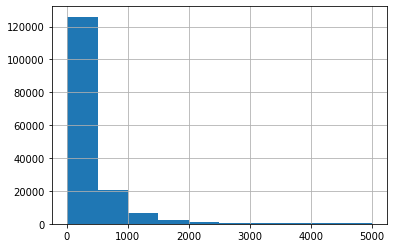

In [8]:
train.comment_text.str.len().hist()
print(len(train[train.comment_text.str.len()==0]))

In [9]:
print(train.shape)
print(test.shape)

train['none'] = 1 - train[list(train.columns)[2:]].max(axis=1)
train.describe()

(159571, 8)
(153164, 2)


,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
none             143346
dtype: int64


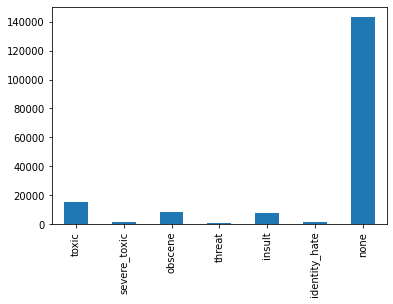

In [10]:
train[list(train.columns)[2:]].sum().plot(kind='bar')
print(train[list(train.columns)[2:]].sum())

In [0]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
  return re_tok.sub(r" \1 ", s).split()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenize, min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1, smooth_idf=1, sublinear_tf=1)

trn_term_doc = vec.fit_transform(train['comment_text'])
test_term_doc = vec.transform(test['comment_text'])

In [16]:
print(len(vec.vocabulary_))
print(vec.get_feature_names()[200:300])
# print(vec.idf_)

961629
['! ( )', '! ( *', '! ( /', '! ( :', '! ( a', '! ( and', '! ( btw', '! ( but', '! ( call', '! ( contact', '! ( don', '! ( hi', '! ( i', '! ( just', '! ( let', '! ( no', '! ( not', '! ( operibus', '! ( or', '! ( p', '! ( reasoning', '! ( see', '! ( sorry', '! ( speak', '! ( t', '! ( talk', '! ( talk•email', '! ( that', '! ( the', '! ( this', '! ( to', '! ( we', '! ( what', '! ( whisper', '! ( with', '! ( yes', '! )', '! ) "', "! ) '", '! ) (', '! ) )', '! ) ,', '! ) -', '! ) .', '! ) :', '! ) ;', '! ) =', '! ) ?', '! ) a', '! ) also', '! ) and', '! ) anyway', '! ) are', '! ) as', '! ) but', '! ) by', '! ) can', '! ) cheers', '! ) dlohcierekim', '! ) do', '! ) from', '! ) he', '! ) here', '! ) hey', '! ) hi', '! ) hope', '! ) how', '! ) i', '! ) if', '! ) in', '! ) is', '! ) it', '! ) just', '! ) my', '! ) or', '! ) please', '! ) re', '! ) so', '! ) sorry', '! ) talk', '! ) than', '! ) thanks', '! ) that', '! ) the', '! ) then', '! ) there', '! ) this', '! ) to', '! ) try', '! ) w

In [17]:
train[train['comment_text'].str.contains("-)", regex=False)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
502,01513d378cb84f20,"""\n My thanks to you for this. I note that I a...",0,0,0,0,0,0,1
914,02846c71f6a25198,"A Tale of a Tub on the Main page\n\nHey, Geogr...",0,0,0,0,0,0,1
1073,02ed4849102d5fc6,"""\nIt was Raul's idea, but we all thought you ...",0,0,0,0,0,0,1
1194,033984ba759fad61,"""\n\n Your most excellent presence is requeste...",0,0,0,0,0,0,1
1270,036f97f61b856d0c,Well we all know that the only way User:Twat c...,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
158906,f59f5987401073f9,"Oh, now sources have to come from more than on...",0,0,0,0,0,0,1
159097,f876dd83ab6138b0,"""\nWohoo, welcome back! When's that RFA coming...",0,0,0,0,0,0,1
159263,fb1bdec305ab587a,Your concern at Wikipedia_talk:IP_block_exempt...,0,0,0,0,0,0,1
159350,fc57663a5e803a0d,"""\n\nThank you, nice translation -). About evo...",0,0,0,0,0,0,1


In [0]:
def pr(y_i, y):
    p = trn_term_doc[y==y_i].sum(axis=0)
    return (p+1) / ((y==y_i).sum()+1)

In [0]:
from sklearn.linear_model import LogisticRegression

def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True, solver='liblinear', max_iter=500)
    trn_term_doc_nb = trn_term_doc.multiply(r)
    return m.fit(trn_term_doc_nb, y), r

In [20]:
label_cols = list(train.columns)[2:-1]
print(label_cols)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [0]:
from sklearn.metrics import roc_auc_score

def multi_roc_auc_score(y_true, y_pred):
  scores = []
  for i in range(y_true.shape[1]):
    scores.append(roc_auc_score(y_true[:, i], y_pred[:, i]))
  return np.array(scores).mean()

In [30]:
preds = np.zeros((len(test), len(label_cols)))
preds1 = np.zeros((len(train), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_term_doc.multiply(r))[:,1]
    preds1[:,i] = m.predict_proba(trn_term_doc.multiply(r))[:,1]

fit toxic
fit severe_toxic
fit obscene
fit threat
fit insult
fit identity_hate


In [33]:
print("ROCAUC Score:", multi_roc_auc_score(train[list(train.columns)[2:-1]].values, preds1))

ROCAUC Score: 0.9999246784576802


In [31]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [0]:
submid = pd.DataFrame({'id': test["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('submission.csv', index=False)